In [88]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [89]:
# Target Account
target_user1 = "@BBC"


# Counter
counter = 1

# Variables for holding sentiments
sentiments1 = []


# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets1 = api.user_timeline(target_user1, max_id = oldest_tweet)
    
     # Loop through all tweets 
    for tweet in public_tweets1:
        
        results1 = analyzer.polarity_scores(tweet["text"])
        compound = results1["compound"]
        
        
         #Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet1 = tweet['id'] - 1
        
        
        # Add sentiments for each tweet into a list
        sentiments1.append({"Date": tweet["created_at"], 
                           "bbc": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
        









In [90]:
sentiments1_pd = pd.DataFrame.from_dict(sentiments1)


In [91]:
target_user2 = "@CBS"

counter = 1
sentiments2 = []
oldest_tweet = None
for x in range(5):
    public_tweets2 = api.user_timeline(target_user2, max_id = oldest_tweet) 
    for tweet in public_tweets2:
        
        results2 = analyzer.polarity_scores(tweet["text"])
        compound = results2["compound"]
        oldest_tweet2 = tweet['id'] - 1
        sentiments2.append({"Date": tweet["created_at"], 
                           "cbs": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
        
sentiments2_pd = pd.DataFrame.from_dict(sentiments2)


In [92]:
target_user3 = "@CNN"


counter= 1
sentiments3 = []
oldest_tweet = None
for x in range(5):
    public_tweets3 = api.user_timeline(target_user3, max_id = oldest_tweet) 
    for tweet in public_tweets3:
        
        results3 = analyzer.polarity_scores(tweet["text"])
        compound = results3["compound"]
        oldest_tweet3 = tweet['id'] - 1
        sentiments3.append({"Date": tweet["created_at"], 
                           "cnn": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
sentiments3_pd = pd.DataFrame.from_dict(sentiments3)      

In [93]:
target_user4 = "@FoxNews"

counter = 1
sentiments4 = []
oldest_tweet = None
for x in range(5):
    public_tweets4 = api.user_timeline(target_user4, max_id = oldest_tweet) 
    for tweet in public_tweets4:
        
        results4 = analyzer.polarity_scores(tweet["text"])
        compound = results4["compound"]
        oldest_tweet4 = tweet['id'] - 1
        sentiments4.append({"Date": tweet["created_at"], 
                           "foxnews": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
sentiments4_pd = pd.DataFrame.from_dict(sentiments4)        

In [94]:
target_user5 = "@nytimes"

counter = 1
sentiments5 = []
oldest_tweet = None
for x in range(5):
    public_tweets5 = api.user_timeline(target_user5, max_id = oldest_tweet) 
    for tweet in public_tweets5:
        
        results5 = analyzer.polarity_scores(tweet["text"])
        compound = results5["compound"]
        oldest_tweet5 = tweet['id'] - 1
        sentiments5.append({"Date": tweet["created_at"], 
                           "nytimes": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
sentiments5_pd = pd.DataFrame.from_dict(sentiments5)        

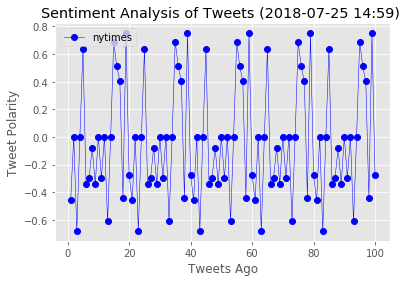

<Figure size 432x288 with 0 Axes>

In [95]:
# Create plot

         
x5_vals = sentiments5_pd["Tweets Ago"]
y5_vals = sentiments5_pd["nytimes"]
plt.plot(x5_vals,
         y5_vals, marker="o", linewidth=0.5,color="blue")

#Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) ")

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend()
plt.show()
plt.savefig("plots/chartsConfig1.png")
         


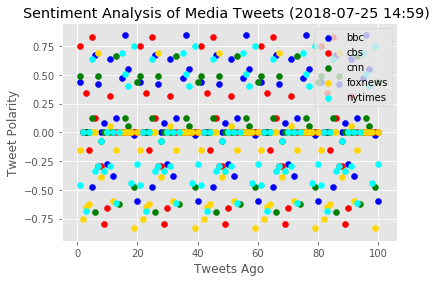

In [96]:
x1_vals = sentiments1_pd["Tweets Ago"]
y1_vals = sentiments1_pd["bbc"]
plt.scatter(x1_vals,y1_vals,marker="o",color="blue")

x2_vals = sentiments2_pd["Tweets Ago"]
y2_vals = sentiments2_pd["cbs"]
plt.scatter(x2_vals,y2_vals,marker="o",color="red")

x3_vals = sentiments3_pd["Tweets Ago"]
y3_vals = sentiments3_pd["cnn"]
plt.scatter(x3_vals,y3_vals,marker="o",color="green")

x4_vals = sentiments4_pd["Tweets Ago"]
y4_vals = sentiments4_pd["foxnews"]
plt.scatter(x4_vals,y4_vals,marker="o",color="gold")

x5_vals = sentiments5_pd["Tweets Ago"]
y5_vals = sentiments5_pd["nytimes"]
plt.scatter(x5_vals,y5_vals,marker="o",color="cyan")

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

plt.title(f"Sentiment Analysis of Media Tweets ({now}) ")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.legend()
plt.savefig("plots/chartsConfig2.png")


In [97]:
# Target Search Term
target_terms =("@BBC", "@CNN", "@FoxNews",
                "@nytimes")
# List to hold results
results_list = []

# Loop through all target users
for target in target_terms:
    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    

    # Loop through 10 times
    for x in range(10):
        # Run search around each tweet
        public_tweets = api.search(
             target, count=100, result_type="recent", max_id=oldest_tweet)
        
        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add  value to the list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

   # Store the Average Sentiments
    sentiment = {
        "User": target,
        "Polarity": np.mean(compound_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)}
    
     # Append the result to 'results_list'
    results_list.append(sentiment)

In [98]:
media_df = pd.DataFrame(results_list).set_index("User").round(2)
media_df

,Negative,Neutral,Polarity,Tweet Count
User,,,,
@BBC,0.84,0.05,0.21,1000
@CNN,0.87,0.07,-0.03,995
@FoxNews,0.84,0.09,-0.12,1000
@nytimes,0.85,0.08,-0.02,1000


Text(0.5,0,'medias')

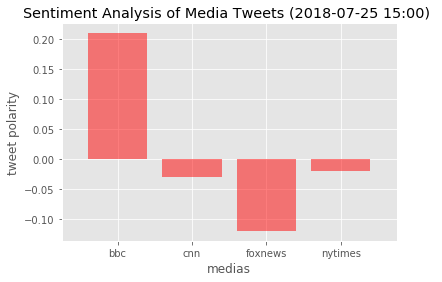

In [99]:
x_axis = np.arange(len(media_df))

plt.bar(x_axis, media_df["Polarity"], color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["bbc", "cnn", "foxnews", "nytimes"])

plt.xlim(-0.75, len(x_axis)-0.25)

#plt.ylim(0, max(media_df))

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")


plt.title(f"Sentiment Analysis of Media Tweets ({now}) ")
plt.ylabel("tweet polarity")
plt.xlabel("medias")
                         